In [224]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)

Mounted at /content/gdrive/


Install pyxlsb library to parse exel file to a pandas dataframe.

In [225]:
!pip install pyxlsb

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


#### **1.   Import libraries**

In [226]:
# data analysis
import pandas as pd
import numpy as np

# model train
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# visualization
import matplotlib.pyplot as plt
import seaborn as sns

#### **2.   Load Dataset**

In [223]:
data = pd.read_excel('/content/gdrive/MyDrive/тестовое (A1 ML Engineer   специалист Департамента розничных рисков)/Training.xlsb')

#### **3.   Data Owerview**

In [227]:
pd.set_option('display.max_columns', None)
data.head()

,ID,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,MARKER
0,1,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,Woman,33.750000,Mogilev region,132,NE employee,Secondary education (plus special education),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,No,0
1,2,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,Woman,33.250000,Minsk region,6,NE employee,Secondary education (plus special education),Married,2 Two,otherwise,No,Works,Yes,Yes,Yes,Yes,No,0
2,3,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,Woman,38.583333,Vitebsk region,71,NE employee,Secondary education (plus special education),Divorced/widow,1 One,property,No,No couple,No,Yes,No,Yes,No,0
3,4,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,Woman,61.250000,Minsk region,48,Pensioner,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,Yes,Few,Yes,No,0
4,5,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,Woman,48.583333,Brest region,48,NE employee,Secondary education (plus special education),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,No,0


In [228]:
data.shape

(89734, 26)

In [229]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89734 entries, 0 to 89733
Data columns (total 26 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      89734 non-null  int64  
 1   A       89734 non-null  float64
 2   B       89734 non-null  float64
 3   C       89734 non-null  float64
 4   D       89734 non-null  float64
 5   E       89734 non-null  float64
 6   F       89734 non-null  float64
 7   G       89734 non-null  int64  
 8   H       89734 non-null  float64
 9   I       89734 non-null  object 
 10  J       89734 non-null  float64
 11  K       89734 non-null  object 
 12  L       89734 non-null  int64  
 13  M       89734 non-null  object 
 14  N       89734 non-null  object 
 15  O       89734 non-null  object 
 16  P       89734 non-null  object 
 17  Q       89734 non-null  object 
 18  R       89734 non-null  object 
 19  S       89734 non-null  object 
 20  T       89734 non-null  object 
 21  U       89734 non-null  object 
 22

In [230]:
pd.concat([data.describe(include='number'), data.describe(include='object')], axis=1, join='outer')

,ID,A,B,C,D,E,F,G,H,J,L,MARKER,I,K,M,N,O,P,Q,R,S,T,U,V,W,X
count,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734.000000,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734,89734
mean,44867.500000,0.167863,0.113511,85.801266,548.507954,1.011455,0.683640,7.854358,0.510274,41.140778,103.719092,0.003811,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,25904.118865,0.153851,0.105340,105.366771,448.686233,0.910583,0.622047,4.754588,0.928146,11.129976,100.458022,0.061618,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,1.000000,0.000002,0.000001,0.000000,49.980000,0.000016,0.000012,2.000000,0.000000,21.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,22434.250000,0.065843,0.042922,20.570000,227.030000,0.405983,0.263775,4.000000,0.000000,32.083333,29.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,44867.500000,0.119133,0.079733,50.020000,408.735000,0.749403,0.499387,5.000000,0.000000,40.000000,69.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,67300.750000,0.220000,0.146990,108.930000,746.710000,1.333367,0.899260,13.000000,0.010000,50.000000,144.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,89734.000000,7.067250,0.874025,2682.420000,4999.000000,35.337000,10.352991,24.000000,3.500000,64.916667,540.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,7,5,4,4,5,3,2,5,2,2,3,2,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Woman,Minsk region,NE employee,Secondary education (plus special education),Married,0 Zero,property,No,Works,Yes,Yes,No,No,No


Looks like perfect data without any missing values :)

#### **Data Preprocessing**

In [231]:
data.drop('ID', axis=1, inplace=True)

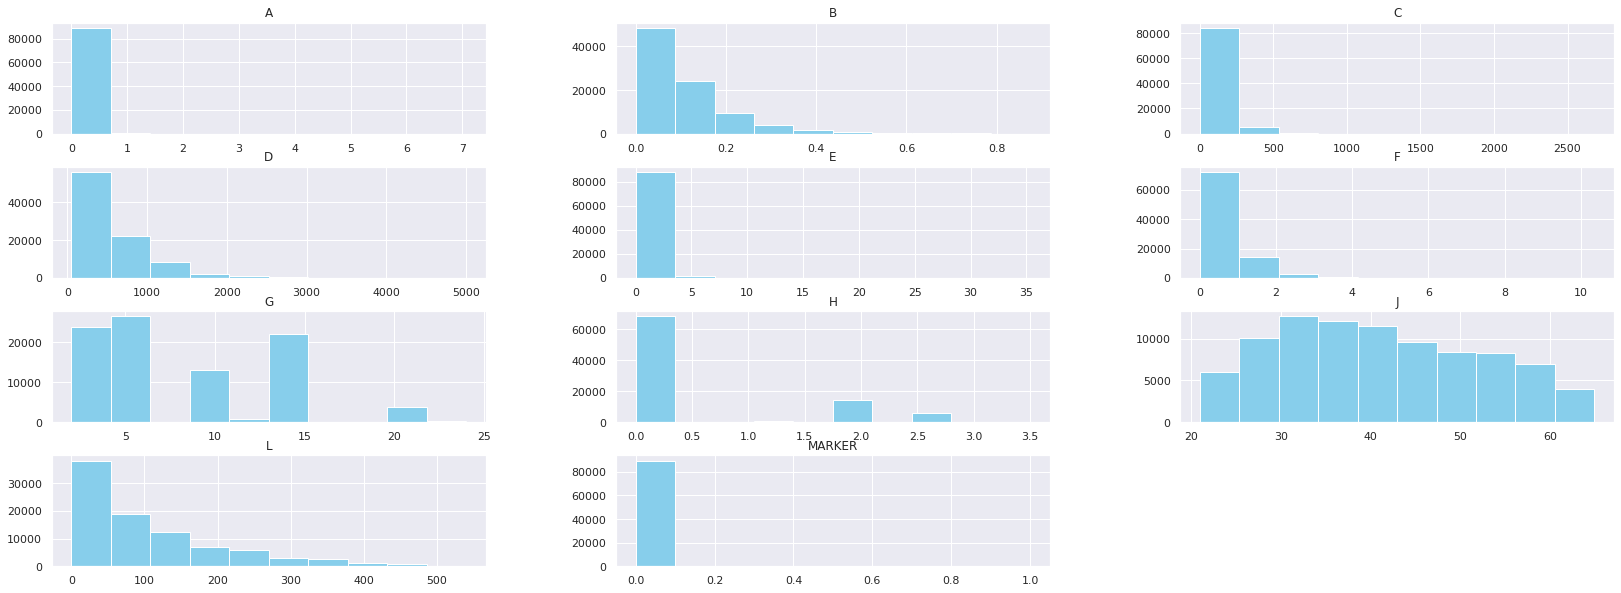

In [232]:
data.hist(figsize=(28, 10), color = "skyblue");

In [233]:
data.loc[data['MARKER'] == 1]

,A,B,C,D,E,F,G,H,I,J,K,L,M,N,O,P,Q,R,S,T,U,V,W,X,MARKER
25,0.185387,0.058345,0.00,1027.90,1.657903,0.521777,13,3.49,Woman,26.666667,Minsk region,25,NE employee,Secondary education (plus special education),Married,3 Three,property,No,Works,No,Yes,Yes,No,No,1
58,0.165800,0.077373,0.00,569.90,1.628286,0.759867,13,2.49,Man,57.583333,Brest region,18,NE employee,Secondary education (plus special education),Married,0 Zero,property,No,Works,Yes,Yes,Yes,No,No,1
60,0.140969,0.063193,0.00,899.90,1.384462,0.620621,13,2.49,Woman,45.750000,Gomel region,72,NE employee,Secondary education (plus special education),Married,0 Zero,property,No,Works,Yes,No,Few,No,No,1
61,0.211462,0.130905,149.98,1349.92,2.076800,1.285638,13,2.49,Man,38.416667,Mogilev region,36,NE employee,Secondary education (plus special education),Married,1 One,property,No,Works,Yes,Yes,No,Yes,No,1
246,0.143741,0.069817,0.00,1199.90,1.411647,0.685657,13,2.49,Woman,46.833333,Minsk region,54,NE employee,Secondary education (plus special education),Married,0 Zero,property,No,Works,No,Yes,No,No,No,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87376,0.123309,0.061655,84.77,339.13,0.616600,0.308300,5,0.00,Woman,35.333333,Minsk,42,NE employee,Higher education (one or more),Married,2 Two,property,No,Works,Yes,Yes,No,Yes,Yes,1
87819,0.061456,0.061456,552.00,2208.00,1.226667,1.226667,20,0.01,Man,59.166667,Mogilev region,156,Head/Deputy head (organiz.),Higher education (one or more),Divorced/widow,0 Zero,property,No,No couple,Yes,No,No,No,Yes,1
88699,0.032343,0.022640,26.03,233.87,0.334100,0.233870,13,1.99,Man,46.750000,Vitebsk region,12,Enterpreneur,Secondary education (plus special education),Married,1 One,property,No,Works,Yes,No,No,No,Yes,1
88772,0.066971,0.066971,26.94,242.06,0.691600,0.691600,13,1.99,Woman,38.333333,Grodno region,225,NE employee,Secondary education (plus special education),Single/unmarried,0 Zero,property,No,No couple,Yes,Yes,No,Yes,No,1


The dataset do not represent all classes of data equally, the model might overfit to the class that’s represented more become oblivious to the existence of the minority class (In this example, a model will keep predicting that MARKER is 0). So we will need to do resampling on train part.

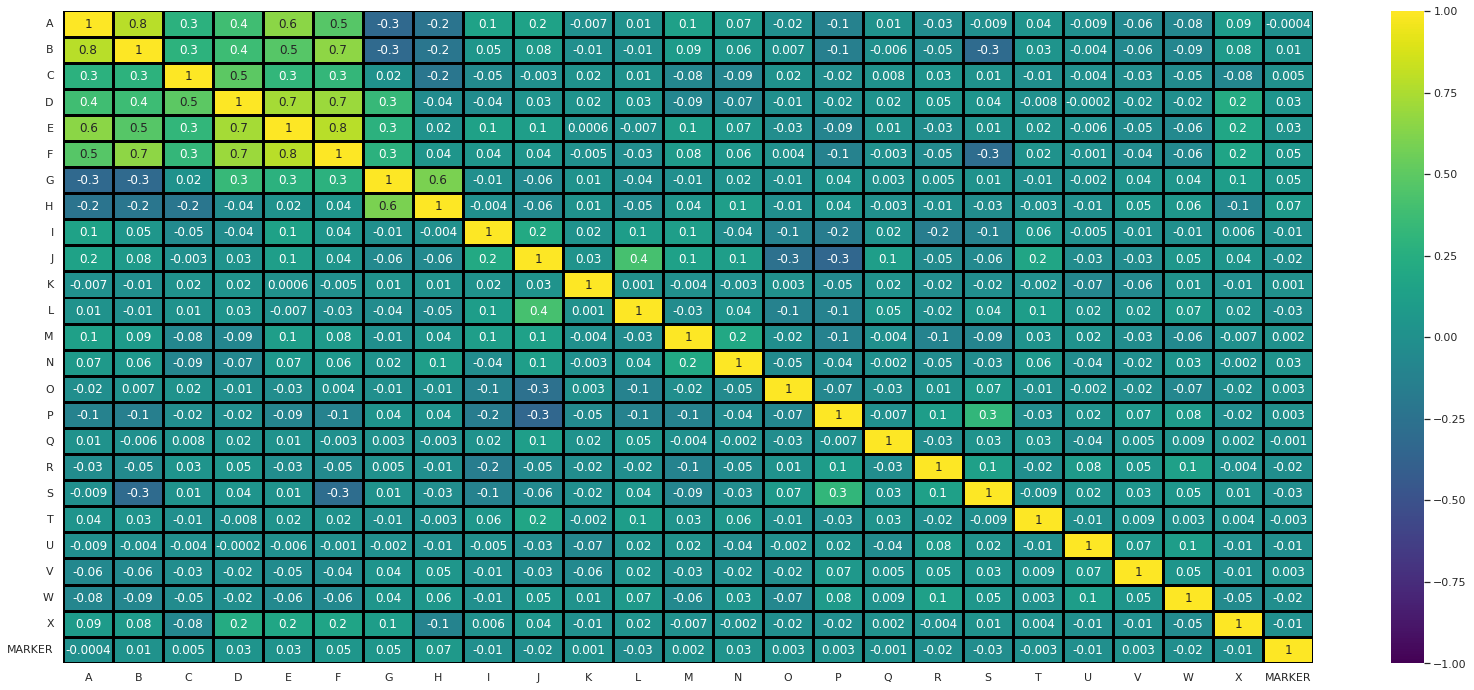

In [234]:
correlation = data.copy()

for column in correlation.select_dtypes(include=['object']).columns:
    correlation[column] = correlation[column].astype('category').cat.codes
    
sns.set(rc={'figure.figsize':(28, 12)})
sns.heatmap(correlation.corr(), annot = True, fmt='.1g', vmin=-1, vmax=1, center= 0, linewidths=2, linecolor='black', cmap="viridis");

In [235]:
object_columns = data.select_dtypes(include=['object']).columns
data = pd.get_dummies(data, columns=object_columns, drop_first=False)

In [236]:
data.head(10)

,A,B,C,D,E,F,G,H,J,L,MARKER,I_Man,I_Woman,K_Brest region,K_Gomel region,K_Grodno region,K_Minsk,K_Minsk region,K_Mogilev region,K_Vitebsk region,M_Enterpreneur,M_Head/Deputy head (division),M_Head/Deputy head (organiz.),M_NE employee,M_Pensioner,N_Higher education (one or more),N_Incomplete higher education,N_Primary or lower secondary education,N_Secondary education (plus special education),O_Cohabitation,O_Divorced/widow,O_Married,O_Single/unmarried,P_0 Zero,P_1 One,P_2 Two,P_3 Three,P_More than 3,Q_otherwise,Q_property,Q_rent/hire,R_No,R_Yes,S_No couple,S_Pensioner,S_Student,S_Unemployed,S_Works,T_No,T_Yes,U_No,U_Yes,V_Few,V_No,V_Yes,W_No,W_Yes,X_No,X_Yes
0,0.198778,0.099389,0.00,799.90,1.777556,0.888778,13,3.49,33.750000,132,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
1,0.043000,0.021264,49.97,173.03,0.384511,0.190143,13,3.49,33.250000,6,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0
2,0.067073,0.067073,0.00,329.90,0.599818,0.599818,13,3.49,38.583333,71,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
3,0.052700,0.052700,0.00,235.65,0.471300,0.471300,13,3.49,61.250000,48,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,1,0,0,0,1,1,0
4,0.141880,0.141880,0.00,634.45,1.268900,1.268900,13,3.49,48.583333,48,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,0,1,0
5,0.054657,0.025507,0.00,171.10,0.488857,0.228133,13,3.49,38.916667,44,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,1,1,0
6,0.117114,0.051238,40.70,366.60,1.047429,0.458250,13,3.49,47.416667,38,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
7,0.088231,0.088231,57.05,512.85,0.789000,0.789000,13,3.49,25.916667,24,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0
8,0.079242,0.079242,26.03,233.87,0.708697,0.708697,13,3.49,63.250000,421,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0
9,0.080296,0.049273,0.00,223.90,0.829259,0.508864,13,1.99,61.666667,18,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [237]:
columns = data.columns.tolist()
columns.remove('MARKER')
print(columns)

['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'J', 'L', 'I_Man', 'I_Woman', 'K_Brest region', 'K_Gomel region', 'K_Grodno region', 'K_Minsk', 'K_Minsk region', 'K_Mogilev region', 'K_Vitebsk region', 'M_Enterpreneur', 'M_Head/Deputy head (division)', 'M_Head/Deputy head (organiz.)', 'M_NE employee', 'M_Pensioner', 'N_Higher education (one or more)', 'N_Incomplete higher education', 'N_Primary or lower secondary education', 'N_Secondary education (plus special education)', 'O_Cohabitation', 'O_Divorced/widow', 'O_Married', 'O_Single/unmarried', 'P_0 Zero', 'P_1 One', 'P_2 Two', 'P_3 Three', 'P_More than 3', 'Q_otherwise', 'Q_property', 'Q_rent/hire', 'R_No', 'R_Yes', 'S_No couple', 'S_Pensioner', 'S_Student', 'S_Unemployed', 'S_Works', 'T_No', 'T_Yes', 'U_No', 'U_Yes', 'V_Few', 'V_No', 'V_Yes', 'W_No', 'W_Yes', 'X_No', 'X_Yes']


In [238]:
x, y = data[columns], data['MARKER']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=6)

#### **Trying under sampling involves removing samples from the majority class.**

In [239]:
train_data = pd.concat([x_train, y_train], axis=1)

In [240]:
negative = train_data[train_data['MARKER'] == 0]
positive = train_data[train_data['MARKER'] == 1]
negative_undersampling = resample(negative, replace=True, n_samples=len(positive), random_state=13)

In [241]:
undersampling_train_data = pd.concat([positive, negative_undersampling])
undersampling_train_data

,A,B,C,D,E,F,G,H,J,L,I_Man,I_Woman,K_Brest region,K_Gomel region,K_Grodno region,K_Minsk,K_Minsk region,K_Mogilev region,K_Vitebsk region,M_Enterpreneur,M_Head/Deputy head (division),M_Head/Deputy head (organiz.),M_NE employee,M_Pensioner,N_Higher education (one or more),N_Incomplete higher education,N_Primary or lower secondary education,N_Secondary education (plus special education),O_Cohabitation,O_Divorced/widow,O_Married,O_Single/unmarried,P_0 Zero,P_1 One,P_2 Two,P_3 Three,P_More than 3,Q_otherwise,Q_property,Q_rent/hire,R_No,R_Yes,S_No couple,S_Pensioner,S_Student,S_Unemployed,S_Works,T_No,T_Yes,U_No,U_Yes,V_Few,V_No,V_Yes,W_No,W_Yes,X_No,X_Yes,MARKER
4779,0.084327,0.084327,0.00,455.50,0.828182,0.828182,13,2.49,24.500000,48,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
21294,0.137456,0.137456,82.49,247.51,0.275011,0.275011,2,0.00,50.333333,10,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1
7988,0.061870,0.061870,0.00,639.00,0.639000,0.639000,13,1.99,51.083333,20,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1
1470,0.080820,0.054608,44.11,396.89,0.793780,0.536338,13,2.49,31.500000,24,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1
4071,0.042714,0.042714,29.63,267.15,0.381643,0.381643,13,3.50,23.250000,12,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66768,0.105114,0.043282,91.97,367.93,0.525614,0.216429,5,0.00,42.833333,84,0,1,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0
76750,0.316650,0.316650,50.01,949.98,1.583300,1.583300,5,0.00,35.333333,180,0,1,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,0
87994,0.057867,0.057867,73.00,1386.00,1.155000,1.155000,20,0.01,31.250000,132,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,1,0
16736,0.077471,0.077471,67.82,271.18,0.387400,0.387400,5,0.00,33.916667,39,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,1,1,0,0


In [242]:
undersampling_train_data.MARKER.value_counts()

1    278
0    278
Name: MARKER, dtype: int64

In [243]:
x_train_undersampling, y_tain_undersampling = undersampling_train_data[columns], undersampling_train_data['MARKER']

#### **Trying Logistic Regression on undersampling data.**

In [244]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train_undersampling, y_tain_undersampling);

In [245]:
test_predictions = model.predict(x_test)

In [246]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_tain_undersampling, model.predict(x_train_undersampling))))
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, test_predictions)))

Training-set accuracy score: 0.8417
Model test accuracy score: 0.7848


#### **Trying synthetic minority over-sampling technique to created enough synthetic data to have the same number of instances in both classes.**

In [247]:
smote = SMOTE(sampling_strategy='auto', random_state=6)
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [248]:
x_train_smote.head(10)

,A,B,C,D,E,F,G,H,J,L,I_Man,I_Woman,K_Brest region,K_Gomel region,K_Grodno region,K_Minsk,K_Minsk region,K_Mogilev region,K_Vitebsk region,M_Enterpreneur,M_Head/Deputy head (division),M_Head/Deputy head (organiz.),M_NE employee,M_Pensioner,N_Higher education (one or more),N_Incomplete higher education,N_Primary or lower secondary education,N_Secondary education (plus special education),O_Cohabitation,O_Divorced/widow,O_Married,O_Single/unmarried,P_0 Zero,P_1 One,P_2 Two,P_3 Three,P_More than 3,Q_otherwise,Q_property,Q_rent/hire,R_No,R_Yes,S_No couple,S_Pensioner,S_Student,S_Unemployed,S_Works,T_No,T_Yes,U_No,U_Yes,V_Few,V_No,V_Yes,W_No,W_Yes,X_No,X_Yes
0,0.070250,0.070250,64.55,580.45,0.725563,0.725563,13,1.99,38.250000,24,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0
1,0.071000,0.071000,0.00,220.00,0.733333,0.733333,13,1.99,41.750000,43,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,1,0,1,0,0,1,1,0
2,0.023333,0.017500,52.47,209.93,0.233256,0.174942,10,0.00,38.666667,241,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,1,0,1,1,0
3,0.173600,0.057867,34.75,104.25,0.347500,0.115833,2,0.00,37.000000,60,1,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
4,0.045471,0.033505,39.82,159.18,0.227400,0.167558,5,0.00,46.166667,72,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,0,1,0,1,1,0
5,0.017800,0.017800,19.97,80.03,0.177844,0.177844,10,0.00,38.416667,12,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
6,0.117400,0.039133,263.60,1054.40,2.343111,0.781037,20,0.01,40.666667,213,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,0,1,1,0
7,0.129191,0.088819,37.42,710.58,0.645982,0.444113,5,0.00,39.166667,180,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,0,1,1,0
8,0.129048,0.129048,348.37,800.03,1.290371,1.290371,10,0.00,55.166667,36,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0
9,0.128400,0.128400,8.47,160.53,0.642120,0.642120,5,0.00,45.250000,192,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0


In [249]:
print(y_train_smote.tolist())

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [255]:
y_train_smote.value_counts()

0    71509
1    71509
Name: MARKER, dtype: int64

In [251]:
x_train_smote.shape, y_train_smote.shape

((143018, 58), (143018,))

#### **Trying Logistic Regression on Synthetic Minority Over-sampling data.**

In [252]:
model = LogisticRegression(solver='liblinear', random_state=0)
model.fit(x_train_smote, y_train_smote);

In [253]:
test_predictions = model.predict(x_test)

In [254]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train_smote, model.predict(x_train_smote))))
print('Model test accuracy score: {0:0.4f}'. format(accuracy_score(y_test, test_predictions)))

Training-set accuracy score: 0.9957
Model test accuracy score: 0.9961
